# Time series Analysis - Air Quality #


<img src="https://timedotcom.files.wordpress.com/2016/01/beijing-air-pollution.jpeg" width="300" height="200"/>

#### What's in the dataset? - ####
Hourly measurements from an array of 5 metal oxide chemical sensors embedded in an Air Quality Chemical Multisensor Device installed at road-level

##### Location - Some city in Italy #####
##### Time Period -  March 2004 to February 2005 #####

More details about the dataset can be found here - [link](https://archive.ics.uci.edu/ml/datasets/Air+Quality)

***

**Objective:**

Perform analysis on individual features to know their distribution. Also see relation between features. Can we make predictions

Before performing analysis on any dataset it is always a good idea to first list what your intuition about the analysis is. It may be incorrect, doesn't matter. The aim of this step is to avoid exploring the whole dataset without any direction.

This process is also called as *Hypothesis Generation*.

**Hypotheses**

1. Over time, the temperature must show increasing trend, excluding the seasonal variations
2. There would be a increasing trend of Carbon Monoxide(CO) assuming there has been an increase in vehicular emissions between Mar 2004 and Feb 2005
3. Level of Pollutants decreases as the day ends

***

*Import Libraries*

In [49]:
import pandas as pd
import numpy as np

In [50]:
df = pd.read_excel('../data/AirQualityUCI/AirQualityUCI.xlsx')

In [51]:
print('Record count',df.shape[0])

Record count 9357


*Let's look at the type of each column*

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9357 entries, 0 to 9356
Data columns (total 15 columns):
Date             9357 non-null datetime64[ns]
Time             9357 non-null object
CO(GT)           9357 non-null float64
PT08.S1(CO)      9357 non-null float64
NMHC(GT)         9357 non-null int64
C6H6(GT)         9357 non-null float64
PT08.S2(NMHC)    9357 non-null float64
NOx(GT)          9357 non-null float64
PT08.S3(NOx)     9357 non-null float64
NO2(GT)          9357 non-null float64
PT08.S4(NO2)     9357 non-null float64
PT08.S5(O3)      9357 non-null float64
T                9357 non-null float64
RH               9357 non-null float64
AH               9357 non-null float64
dtypes: datetime64[ns](1), float64(12), int64(1), object(1)
memory usage: 1.1+ MB


All of them are float, except 'Time' which we'll combine with 'Date' field to get a TimeStamp for every record. 

Combining will help us to see trend at different levels such as hourly, daily and monthly

In [53]:
df['DateTime'] = df['Date'].astype(str) +' '+ df['Time'].astype(str)
df['DateTime'] = pd.to_datetime(df['DateTime'])
df['DateTime'].head(2)

0   2004-03-10 18:00:00
1   2004-03-10 19:00:00
Name: DateTime, dtype: datetime64[ns]

*Displaying top 2 rows*

In [54]:
df.head(2)

,Date,Time,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH,DateTime
0,2004-03-10,18:00:00,2.6,1360.00,150,11.881723,1045.50,166.0,1056.25,113.0,1692.00,1267.50,13.6,48.875001,0.757754,2004-03-10 18:00:00
1,2004-03-10,19:00:00,2.0,1292.25,112,9.397165,954.75,103.0,1173.75,92.0,1558.75,972.25,13.3,47.700000,0.725487,2004-03-10 19:00:00


*Let's look at the summary of the values for every column*

In [55]:
df.describe()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,-34.207524,1048.869652,-159.090093,1.865576,894.475963,168.604200,794.872333,58.135898,1391.363266,974.951534,9.776600,39.483611,-6.837604
std,77.657170,329.817015,139.789093,41.380154,342.315902,257.424561,321.977031,126.931428,467.192382,456.922728,43.203438,51.215645,38.976670
min,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000,-200.000000
25%,0.600000,921.000000,-200.000000,4.004958,711.000000,50.000000,637.000000,53.000000,1184.750000,699.750000,10.950000,34.050000,0.692275
50%,1.500000,1052.500000,-200.000000,7.886653,894.500000,141.000000,794.250000,96.000000,1445.500000,942.000000,17.200000,48.550000,0.976823
75%,2.600000,1221.250000,-200.000000,13.636091,1104.750000,284.200000,960.250000,133.000000,1662.000000,1255.250000,24.075000,61.875000,1.296223
max,11.900000,2039.750000,1189.000000,63.741476,2214.000000,1479.000000,2682.750000,339.700000,2775.000000,2522.750000,44.600000,88.725000,2.231036


We can see all of them have -200 as the minimum value. This is because the authors of the dataset used -200 to indicate missing values. 

One naive thought would be to replace them by 0. But be careful, doing so for the T (Temperature) column will change the meaning. We must understand the scale of each column before doing any imputation.

Just looking at the summary we can start finding insights:
1. NMHC(GT) has mean as negative, and all percentiles as -200, except max. This indicates we barely have values in this column. In a professional setting, we must ask the authors what went wrong
while collecting the data for this column.

NameError: name 'plt' is not defined

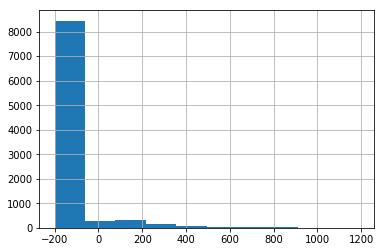

In [57]:
df['NMHC(GT)'].hist()

<!DOCTYPE html>
<meta charset="utf-8">
<html>
  <head>
    <style>
      rect.bordered {
        stroke: #E6E6E6;
        stroke-width:2px;   
      }

      text.mono {
        font-size: 9pt;
        font-family: Consolas, courier;
        fill: #aaa;
      }

      text.axis-workweek {
        fill: #000;
      }

      text.axis-worktime {
        fill: #000;
      }
    </style>
    <script src="http://d3js.org/d3.v3.js"></script>
  </head>
  <body>
    <div id="chart"></div>
    <div id="dataset-picker">
    </div>
    <script type="text/javascript">
      var margin = { top: 50, right: 0, bottom: 100, left: 30 },
          width = 960 - margin.left - margin.right,
          height = 430 - margin.top - margin.bottom,
          gridSize = Math.floor(width / 24),
          legendElementWidth = gridSize*2,
          buckets = 9,
          colors = ["#ffffd9","#edf8b1","#c7e9b4","#7fcdbb","#41b6c4","#1d91c0","#225ea8","#253494","#081d58"], // alternatively colorbrewer.YlGnBu[9]
          days = ["Mo", "Tu", "We", "Th", "Fr", "Sa", "Su"],
          times = ["1a", "2a", "3a", "4a", "5a", "6a", "7a", "8a", "9a", "10a", "11a", "12a", "1p", "2p", "3p", "4p", "5p", "6p", "7p", "8p", "9p", "10p", "11p", "12p"];
          datasets = ["data.tsv", "data2.tsv"];

      var svg = d3.select("#chart").append("svg")
          .attr("width", width + margin.left + margin.right)
          .attr("height", height + margin.top + margin.bottom)
          .append("g")
          .attr("transform", "translate(" + margin.left + "," + margin.top + ")");

      var dayLabels = svg.selectAll(".dayLabel")
          .data(days)
          .enter().append("text")
            .text(function (d) { return d; })
            .attr("x", 0)
            .attr("y", function (d, i) { return i * gridSize; })
            .style("text-anchor", "end")
            .attr("transform", "translate(-6," + gridSize / 1.5 + ")")
            .attr("class", function (d, i) { return ((i >= 0 && i <= 4) ? "dayLabel mono axis axis-workweek" : "dayLabel mono axis"); });

      var timeLabels = svg.selectAll(".timeLabel")
          .data(times)
          .enter().append("text")
            .text(function(d) { return d; })
            .attr("x", function(d, i) { return i * gridSize; })
            .attr("y", 0)
            .style("text-anchor", "middle")
            .attr("transform", "translate(" + gridSize / 2 + ", -6)")
            .attr("class", function(d, i) { return ((i >= 7 && i <= 16) ? "timeLabel mono axis axis-worktime" : "timeLabel mono axis"); });

      var heatmapChart = function(tsvFile) {
        d3.tsv(tsvFile,
        function(d) {
          return {
            day: +d.day,
            hour: +d.hour,
            value: +d.value
          };
        },
        function(error, data) {
          var colorScale = d3.scale.quantile()
              .domain([0, buckets - 1, d3.max(data, function (d) { return d.value; })])
              .range(colors);

          var cards = svg.selectAll(".hour")
              .data(data, function(d) {return d.day+':'+d.hour;});

          cards.append("title");

          cards.enter().append("rect")
              .attr("x", function(d) { return (d.hour - 1) * gridSize; })
              .attr("y", function(d) { return (d.day - 1) * gridSize; })
              .attr("rx", 4)
              .attr("ry", 4)
              .attr("class", "hour bordered")
              .attr("width", gridSize)
              .attr("height", gridSize)
              .style("fill", colors[0]);

          cards.transition().duration(1000)
              .style("fill", function(d) { return colorScale(d.value); });

          cards.select("title").text(function(d) { return d.value; });
          
          cards.exit().remove();

          var legend = svg.selectAll(".legend")
              .data([0].concat(colorScale.quantiles()), function(d) { return d; });

          legend.enter().append("g")
              .attr("class", "legend");

          legend.append("rect")
            .attr("x", function(d, i) { return legendElementWidth * i; })
            .attr("y", height)
            .attr("width", legendElementWidth)
            .attr("height", gridSize / 2)
            .style("fill", function(d, i) { return colors[i]; });

          legend.append("text")
            .attr("class", "mono")
            .text(function(d) { return "≥ " + Math.round(d); })
            .attr("x", function(d, i) { return legendElementWidth * i; })
            .attr("y", height + gridSize);

          legend.exit().remove();

        });  
      };

      heatmapChart(datasets[0]);
      
      var datasetpicker = d3.select("#dataset-picker").selectAll(".dataset-button")
        .data(datasets);

      datasetpicker.enter()
        .append("input")
        .attr("value", function(d){ return "Dataset " + d })
        .attr("type", "button")
        .attr("class", "dataset-button")
        .on("click", function(d) {
          heatmapChart(d);
        });
    </script>
  </body>
</html>